In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_file = './house_data.csv'
df = pd.read_csv(path_to_file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.drop('id', inplace=True, axis=1)

In [6]:
df_test = df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
print('MISSIN VALUES :\n')
print(df.isnull().sum())

MISSIN VALUES :

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [9]:
df_test.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [11]:
df_test.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
df_test.dtypes

date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [13]:
X = df_test[['sqft_lot']]

In [14]:
type(X)

pandas.core.frame.DataFrame

In [15]:
y = df['price']

In [16]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

In [17]:
df_test.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


(array([1.1041e+04, 7.9800e+03, 1.6390e+03, 5.0900e+02, 2.3300e+02,
        8.3000e+01, 5.7000e+01, 3.3000e+01, 1.6000e+01, 1.0000e+01,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  75000.,  456250.,  837500., 1218750., 1600000., 1981250.,
        2362500., 2743750., 3125000., 3506250., 3887500., 4268750.,
        4650000., 5031250., 5412500., 5793750., 6175000., 6556250.,
        6937500., 7318750., 7700000.]),
 <BarContainer object of 20 artists>)

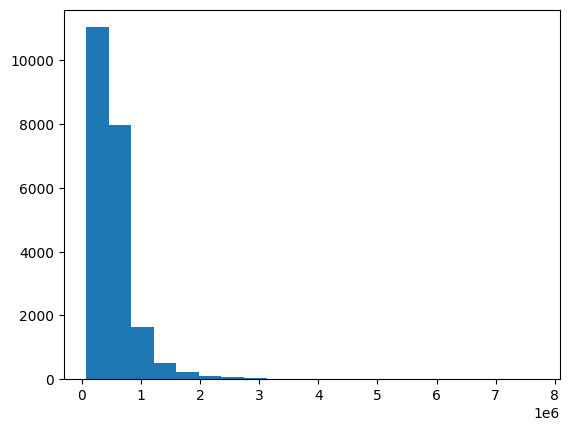

In [18]:
plt.hist(y, bins=20)

(array([2.0049e+04, 9.0900e+02, 1.8600e+02, 1.1200e+02, 4.7000e+01,
        4.8000e+01, 1.3700e+02, 3.2000e+01, 2.2000e+01, 1.2000e+01,
        6.0000e+00, 1.0000e+01, 8.0000e+00, 1.1000e+01, 2.0000e+00,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.20000000e+02, 3.35367800e+04, 6.65535600e+04, 9.95703400e+04,
        1.32587120e+05, 1.65603900e+05, 1.98620680e+05, 2.31637460e+05,
        2.64654240e+05, 2.97671020e+05, 3.30687800e+05, 3.63704580e+05,
        3.96721360e+05, 4.29738140e+05, 4.62754920e+05, 4.95771700e+05,
        5.28788480e+05, 5.6180

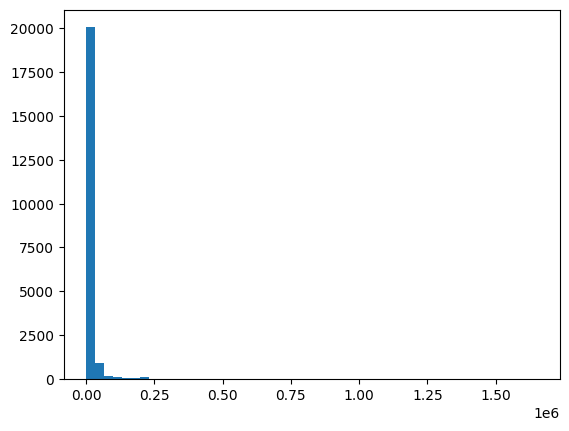

In [19]:
plt.hist(X, bins=50)

In [20]:
df.shape

(21613, 20)

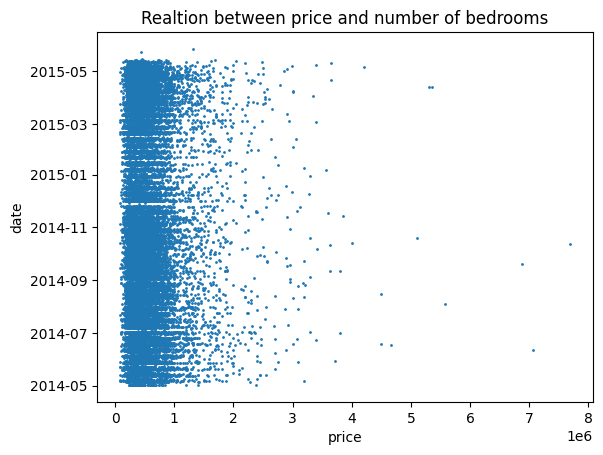

In [21]:
df.plot.scatter(x='price', y='date', title='Realtion between price and number of bedrooms', s=1);

In [22]:
print(df.corr(numeric_only=True))

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

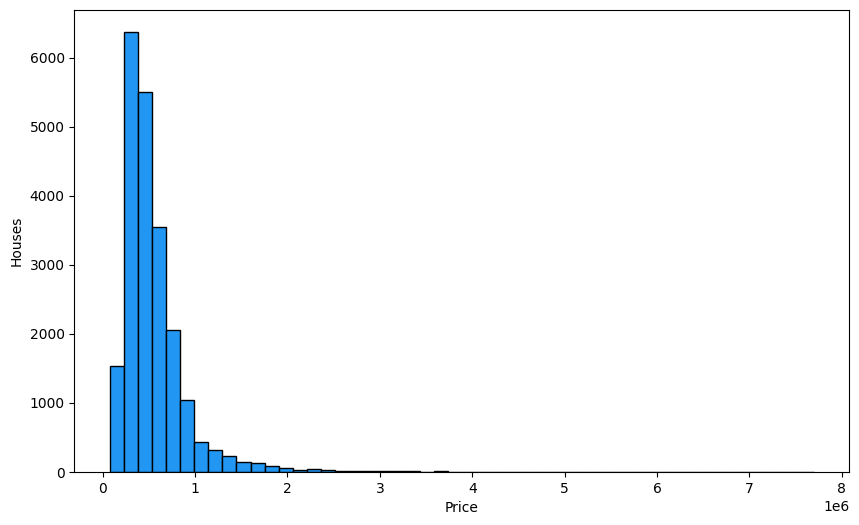

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, ec='black', color='#2196f3')
plt.xlabel("Price")
plt.ylabel("Houses")
plt.show()

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>],
       [<AxesSubplot: title={'center': 'sqft_lot'}>,
        <AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'waterfront'}>,
        <AxesSubplot: title={'center': 'view'}>],
       [<AxesSubplot: title={'center': 'condition'}>,
        <AxesSubplot: title={'center': 'grade'}>,
        <AxesSubplot: title={'center': 'sqft_above'}>,
        <AxesSubplot: title={'center': 'sqft_basement'}>],
       [<AxesSubplot: title={'center': 'yr_built'}>,
        <AxesSubplot: title={'center': 'yr_renovated'}>,
        <AxesSubplot: title={'center': 'zipcode'}>,
        <AxesSubplot: title={'center': 'lat'}>],
       [<AxesSubplot: title={'center': 'long'}>,
        <AxesSubplot: title={'center': 'sqft_living15'}>,
        <AxesSubplot: title={'center': 's

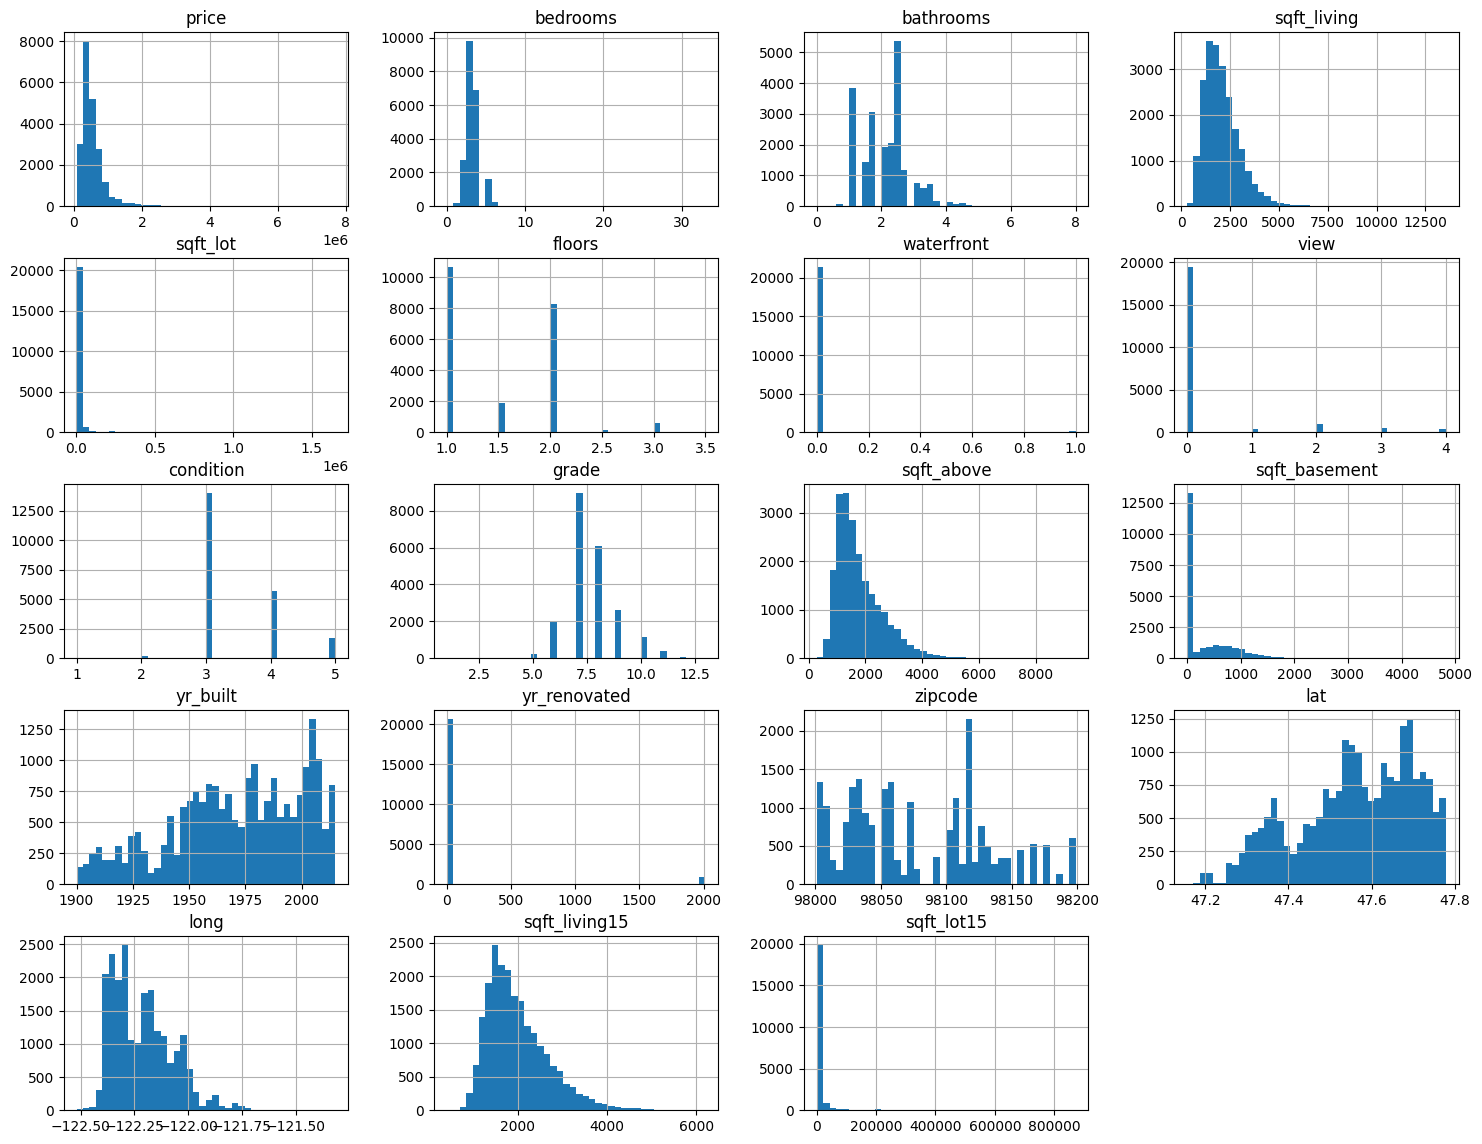

In [24]:
num_cols = list(df.select_dtypes(['int64', 'float64']))
df[num_cols].hist(bins=40, figsize=(18,14))

In [25]:
before = df['date'].count()

df_test.drop(df_test[df_test['price'] > 2000000].index, inplace=True)

after = df_test['date'].count()

In [26]:
print(before, after)

21613 21415


In [52]:
X = df_test[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']]

In [53]:
y = df_test['price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)


In [69]:
regression = LinearRegression()

In [70]:
regression.fit(X_train, y_train)

LinearRegression()

In [71]:
print(regression.score(X_train, y_train))
print(regression.score(X_test, y_test))

0.47417843657678405
0.47059038480867177


In [72]:
regression.coef_

array([ 2.42221763e+02, -1.13480667e-01, -3.60594727e+04,  9.59136791e+03])